In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
#DATA_PATH = r'C:\Users\lgalvan\OneDrive - Vallen\Documents\data project\house-prices-data'
DATA_PATH = r'G:\Mi unidad\Data Science\house-prices-data'
def load_data(data_path = DATA_PATH, file_name = "train.csv"):
        csv_path = os.path.join(data_path, file_name)
        return pd.read_csv(csv_path)
df = load_data()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Assign values to ordered_categories (Excelent, Good, Average, Poor)

In [ ]:
ordered_categories = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu",
                      "GarageFinish", "GarageQual", "GarageCond", "PoolQC"]
mapping = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0, "Gd":4, "Av":3, "Mn":2, "No":1, "GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "Fin":3, "RFn":2}
df[ordered_categories] = df[ordered_categories].replace(mapping)
df.drop(columns = "Id", inplace=True)

C:\Users\glgal\AppData\Local\Temp\ipykernel_13188\390160069.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[ordered_categories] = df[ordered_categories].replace(mapping)


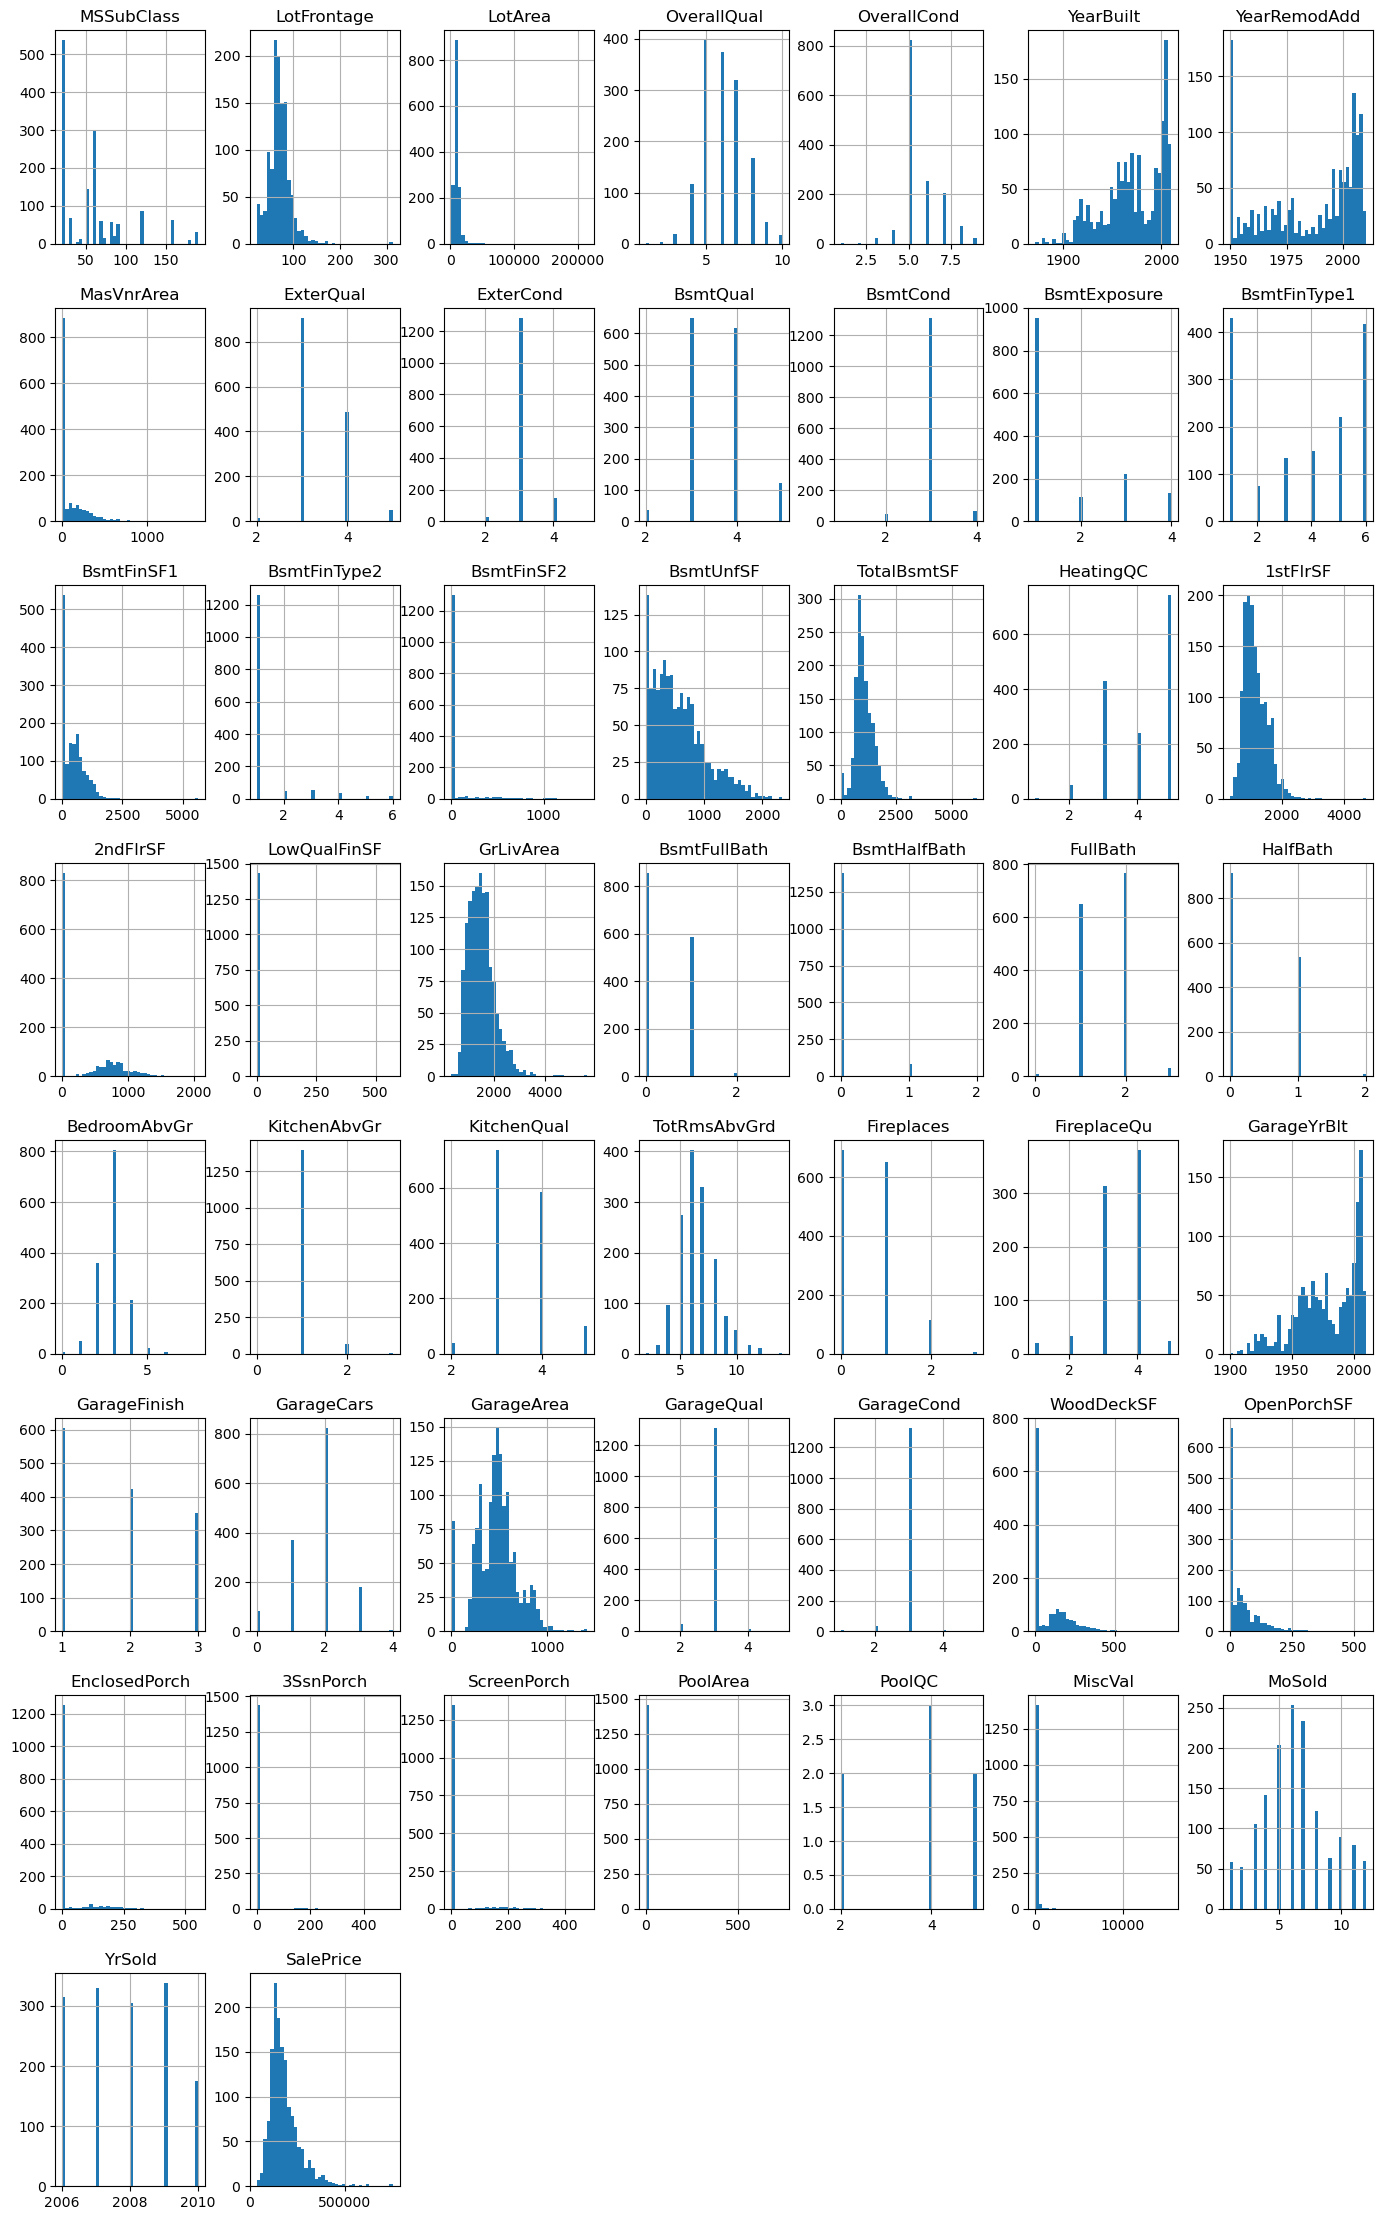

In [ ]:
%matplotlib inline
df.hist(bins=40, figsize=(17,28))
plt.show()

## Test set creation

When you restart the notebook, the split is random again, so new rows end up in the test set or train set. But, as you try new model settings, tune hyperparameters, etc., you may accidentally use all the data for training across different experiments—just not at the same time!

Therefore, it is important to keep the same test set every time I re run the model and adjust the hyperparameters, etc

In [ ]:
from sklearn.model_selection import train_test_split
train_set_simple_split, test_set_simple_split = train_test_split(df, test_size=0.2, random_state=42)

##### Categorization of GrLivArea (Above ground living area square feet)

In [ ]:
#  creation of First floor area category attribute (ranges of first floor area)
def stratification(df_to_strat):
    df_to_strat["GrLivArea_cat"] = pd.cut(df_to_strat["GrLivArea"],  bins=[0, 500, 1000, 1500, 2000, np.inf],  labels=[1, 2, 3, 4, 5])
    return df_to_strat

df = stratification(df)
df["GrLivArea_cat"].hist()

<Axes: >

In [ ]:
test_set = stratification(test_set_simple_split)
train_set = stratification(train_set_simple_split)

In [ ]:
# to have the same number of instances of attribute "GrLivArea_cat" as original df
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["GrLivArea_cat"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]

In [ ]:
proportion_comparison = pd.DataFrame()
proportion_comparison["original"] = df["GrLivArea_cat"].value_counts() / len(df)
proportion_comparison["random"] = train_set["GrLivArea_cat"].value_counts() / len(train_set)
proportion_comparison["stratified"] = strat_train_set["GrLivArea_cat"].value_counts() / len(strat_train_set)
proportion_comparison.sort_index(axis=0, ascending=True, inplace=True, kind='quicksort')
proportion_comparison

,original,random,stratified
GrLivArea_cat,,,
1,0.002055,0.001712,0.001712
2,0.156164,0.145548,0.156678
3,0.379452,0.380993,0.379281
4,0.315753,0.322774,0.315925
5,0.146575,0.148973,0.146404


In [ ]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("GrLivArea_cat", axis=1, inplace=True)

## Visualize data to get Insights

In [ ]:
housing = strat_train_set.copy()
housing_num = housing.select_dtypes(include = 'number')

In [ ]:
corr_matrix = housing_num.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.784711
GrLivArea        0.736365
ExterQual        0.680330
PoolQC           0.666811
KitchenQual      0.658494
TotalBsmtSF      0.644454
BsmtQual         0.640011
GarageCars       0.635699
GarageArea       0.626592
1stFlrSF         0.620484
FullBath         0.557774
TotRmsAbvGrd     0.537667
YearBuilt        0.521191
GarageFinish     0.496447
YearRemodAdd     0.493017
GarageYrBlt      0.489249
Fireplaces       0.485434
MasVnrArea       0.478930
HeatingQC        0.424115
BsmtFinSF1       0.397741
LotFrontage      0.358980
WoodDeckSF       0.351173
2ndFlrSF         0.337560
OpenPorchSF      0.336194
BsmtExposure     0.334789
LotArea          0.312940
FireplaceQu      0.298621
HalfBath         0.284687
BsmtFinType1     0.266986
BsmtUnfSF        0.223517
BsmtFullBath     0.220136
BedroomAbvGr     0.177746
GarageQual       0.143934
ScreenPorch      0.122719
BsmtCond         0.122251
GarageCond       0.119468
PoolArea         0.110034
3SsnPorch   

In [ ]:
housing.plot(kind = "scatter", x = "GrLivArea", y = "SalePrice", alpha = 0.2)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice","OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea", "1stFlrSF"]
scatter_matrix(housing[attributes], figsize =(20,8))

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabe

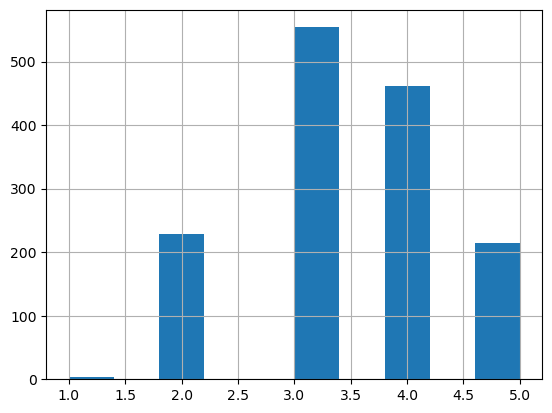

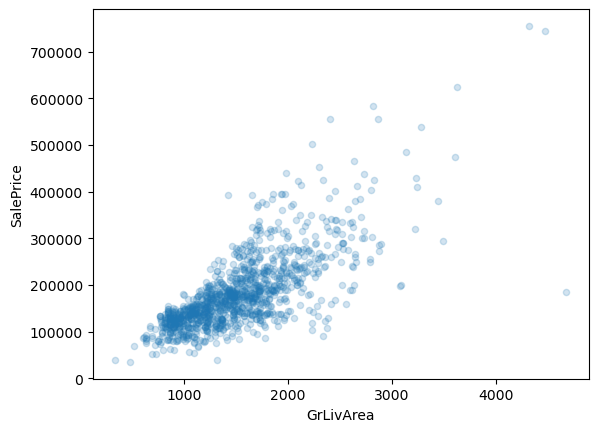

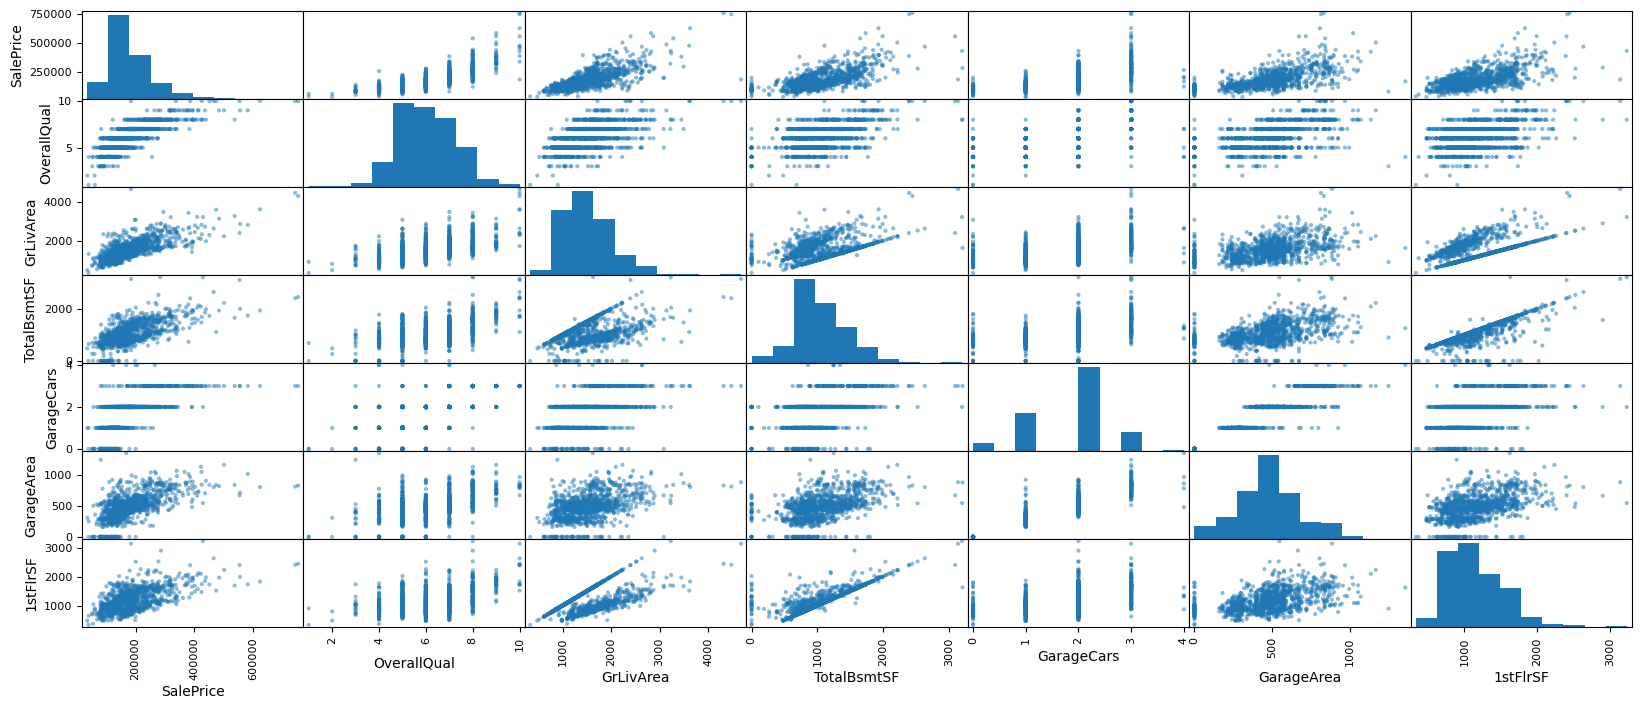

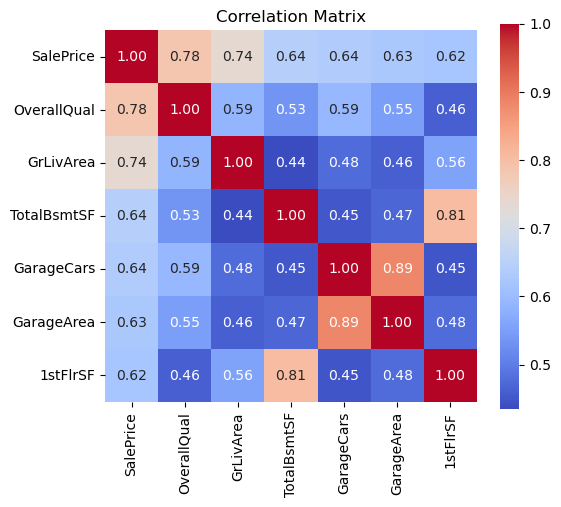

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 5))
corr = housing[attributes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

## Missing values

 You have three options:
1. Get rid of the corresponding rows (for low number of null vallues and missingness appears random)
2. Get rid of the whole attribute. (If missing values are >30-40% and column is not critical in model performance)
3. Set the values to some value (zero, the mean, the median, etc.)

In [ ]:
def check_null_values(df):
    null_counts = df.isnull().sum()
    null_table = null_counts[null_counts > 0].reset_index()
    null_table = null_table.sort_values(by = 0, ascending = False)
    null_table.rename(columns = {"index": "Attribute", 0: "Null Count"}, inplace = True)
    return null_table
null_table = check_null_values(housing)
null_table.head(5)

,Attribute,Null Count
16,PoolQC,1163
18,MiscFeature,1127
1,Alley,1096
17,Fence,942
2,MasVnrType,686


In [ ]:
# nulls rows could be deleted for "MasVnrArea" because it has only 5 missing values, 0.33% of the total rows: housing.dropna(subset=["MasVnrArea"], inplace=True)
# cols with null values will be filled with the mean value of the attribute, missing values for each column represent less than 15%
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

housing_num = housing.select_dtypes(include = 'number')
imputer.fit(housing_num) # imputer.statistics_ will contain the mean values of each column

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing[housing_num.columns] = housing_tr

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.feature_selection import mutual_info_regression

def select_by_corr_clustering(df, target, corr_threshold=0.8, pearson_tol=0.3, mi_random_state=0):
    """
    1) Build |corr| matrix among predictors.
    2) Convert to a distance matrix d = 1 - |corr|.
    3) Hierarchical clustering on distances.
    4) From each cluster, keep ONE feature:
       - Highest |Pearson(feature, target)|
       - If |Pearson| within pearson_tol, choose higher MI(feature, target).
    """

    df = df.select_dtypes(include='number').copy()
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in df")
    if df.isna().any().any():
        raise ValueError("NaNs detected: impute before running selection")
    X = df.drop(columns=[target])
    y = df[target]

    pearson = df.corr()[target].abs().drop(target).fillna(0.0)
    mi = pd.Series(
        mutual_info_regression(X, y, random_state=mi_random_state),
        index=X.columns
    ).fillna(0.0)

    corr = X.corr().abs().fillna(0.0)
    dist = 1 - corr
    np.fill_diagonal(dist.values, 0.0)

    condensed = squareform(dist.values, checks=False)
    Z = linkage(condensed, method='average')

    distance_cut = 1 - corr_threshold
    clusters = fcluster(Z, t=distance_cut, criterion='distance')
    cluster_map = pd.DataFrame({'feature': corr.columns, 'cluster': clusters})

    selected = []
    for cid, grp in cluster_map.groupby('cluster'):
        feats = grp['feature'].tolist()

        # pick best by Pearson; if |diff| <= pearson_tol, break tie by MI
        feats_sorted = sorted(
            feats,
            key=lambda f: (round(pearson.get(f, 0.0), 12), round(mi.get(f, 0.0), 12)),
            reverse=True
        )

        best = feats_sorted[0]
        if len(feats_sorted) >= 2:
            f1, f2 = feats_sorted[0], feats_sorted[1]
            if abs(pearson[f1] - pearson[f2]) <= pearson_tol:

                best = f1 if mi[f1] >= mi[f2] else f2

        selected.append(best)
    return selected

selected_features = select_by_corr_clustering(housing, 'SalePrice', corr_threshold=0.85, pearson_tol=0.3)
print(selected_features)
selected_features.append('SalePrice')
housing_clean = housing[selected_features]

['MoSold', 'YrSold', 'OverallCond', 'ExterCond', 'BsmtCond', 'BsmtHalfBath', 'BsmtFinType2', 'BsmtFinSF2', 'FireplaceQu', 'GarageQual', 'GarageCond', 'EnclosedPorch', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtExposure', 'GrLivArea', 'TotRmsAbvGrd', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'YearBuilt', 'GarageYrBlt', 'BsmtQual', 'OverallQual', 'ExterQual', 'KitchenQual', 'YearRemodAdd', 'GarageFinish', 'HeatingQC', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'OpenPorchSF', 'LotArea', 'Fireplaces', 'WoodDeckSF', 'MSSubClass', 'LotFrontage', 'KitchenAbvGr', 'LowQualFinSF', 'ScreenPorch', 'PoolQC', 'MiscVal', 'PoolArea', '3SsnPorch']


### Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif_df = vif_df.sort_values(by = "VIF", ascending = False).reset_index(drop = True)
    return (vif_df)

def correlation_cleaning_1(df):
    df_features = df.drop("SalePrice", axis=1)
    df_cleaned = df_features.select_dtypes(include = 'number')
    vif = calc_vif(df_cleaned)

    while vif["VIF"].max() > 5:
        var = vif.loc[vif["VIF"].idxmax(), "variables"]
        print(f"variable to delete: {var}, Max VIF: {vif['VIF'].max()}")
        df_cleaned.drop(columns = var, inplace = True)
        vif = calc_vif(df_cleaned)
        print(vif)
    return df_cleaned, vif

features_num, final_vif = correlation_cleaning_1(housing_clean)

c:\Users\glgal\anaconda3\envs\env_1\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variable to delete: TotalBsmtSF, Max VIF: inf


c:\Users\glgal\anaconda3\envs\env_1\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


        variables           VIF
0        1stFlrSF           inf
1    LowQualFinSF           inf
2        2ndFlrSF           inf
3       GrLivArea           inf
4          YrSold  4.141028e+04
5    YearRemodAdd  2.629403e+04
6     GarageYrBlt  2.623963e+04
7       YearBuilt  2.600084e+04
8          PoolQC  2.044951e+03
9      GarageQual  2.783220e+02
10     GarageCond  2.777121e+02
11       BsmtCond  1.389585e+02
12      ExterQual  1.150737e+02
13      ExterCond  9.983910e+01
14       BsmtQual  9.144857e+01
15   TotRmsAbvGrd  8.611527e+01
16    OverallQual  7.986529e+01
17    KitchenQual  7.856675e+01
18    OverallCond  5.040845e+01
19    FireplaceQu  4.881035e+01
20   KitchenAbvGr  3.931650e+01
21   BedroomAbvGr  3.443221e+01
22      HeatingQC  3.421577e+01
23       FullBath  2.780896e+01
24    LotFrontage  1.864537e+01
25     GarageCars  1.366254e+01
26      BsmtUnfSF  1.197645e+01
27     BsmtFinSF1  1.156098e+01
28   GarageFinish  1.120056e+01
29   BsmtFinType1  1.062626e+01
30   Bsm

## Handling with strings

If text is not arbitrary and unique values are limited, then the attribute can be a categorical attribute and can be converted to a numerical value.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
features_cat = housing.select_dtypes(include=['object', 'category'])
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(features_cat) # 2D array with categorical values
ordinal_encoder.categories_[0:4]

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)]

#### *one-hot encoding* to not ordered categories

only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
NOTE: When categorical attribute has a large number of categories, one-hot encoding can slow down the training and performance. categories can be replaced with useful numerical features (e.i. country code by GDP per capita and population). Alternatively, categories can be replaced by a learnable, low-dimensional vector called an embedding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
features_cat_1hot = cat_encoder.fit_transform(features_cat) # sparse matrix with categorical values. Only saves the non-zero values to save memory
#housing_cat_1hot.toarray() # convert sparse matrix to dense array for better visualization
features_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 33872 stored elements and shape (1168, 190)>

#### Robust scaler
Features with very different scales are harder to visualize and most important, generate a bias in ML models.  

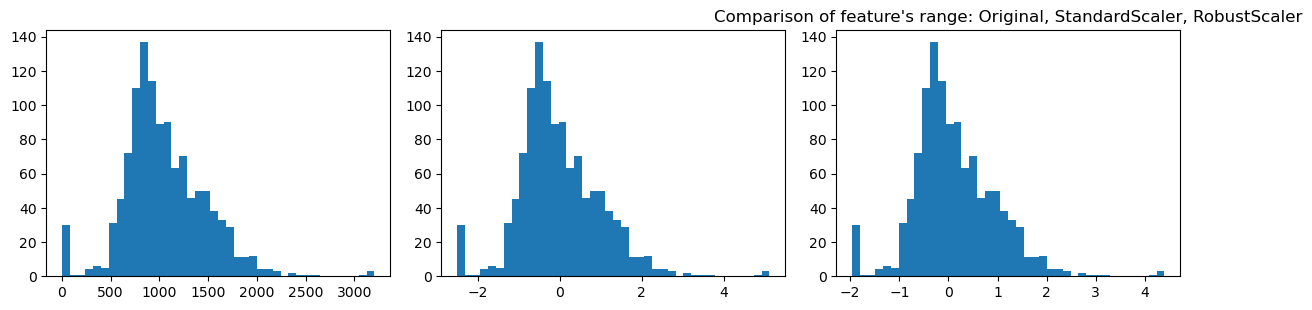

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
test = housing[["TotalBsmtSF"]]

standard_scaler = StandardScaler()
x_standard = standard_scaler.fit_transform(test)

robust_scaler = RobustScaler()
x_robust = robust_scaler.fit_transform(test)

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(housing["TotalBsmtSF"], bins=40, label = 'TotalBsmtSF')
axs[1].hist(x_standard, bins=40, label = 'Stardard_TotalBsmtSF')
axs[2].hist(x_robust, bins=40, label = 'Stardard_TotalBsmtSF')
plt.tight_layout()
plt.title("Comparison of feature's range: Original, StandardScaler, RobustScaler")
plt.show()

#### Transformation Pipelines

Previously missing values were treated with the sklearn SimpleImputer by calling manually the fit and transform methods. Nevertheless, Pipelines can run this and more classes in a row

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# full pipeline that handles the transformation for the two groups of columns (numerical and categorical). Each tuple has: a name, Transformer and a list of columns
# the columns not listed will be dropped by default. to prevent this we can specify "pas through"
num_list = list(features_num)
cat_list = list(features_cat)

num_pipeline = Pipeline([
    ('std_scaler', RobustScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_list), #returns a dense matrix
    ('cat', OneHotEncoder(), cat_list) #returns a sparse matrix
])

features = features_num.join(features_cat, how = 'left')
features_prepared = full_pipeline.fit_transform(features)

# ColumnTransformer returns a sparse matrix if density (ratio of non zero cells) is lower than 0.3 (By default)
# here, as matrix had a large amount of non zero cells, it returns a dense matrix

#to call an attribute use named_transformers_["transformer's instance"].attribute
#full_pipeline.named_transformers_['cat'].categories_

labels = housing_clean["SalePrice"].copy()
y_scaler = RobustScaler()
labels_scaled = y_scaler.fit_transform(labels.values.reshape(-1,1)).flatten()

### Linear Regression

Regression with all variables: R²: 0.9350023211273666, RMSE: 20323.66735247253, Sale price range: (35311, 755000)

after corr_threshold=0.7, VIF > 7 R²: 0.86383, RMSE: 0.3500

after corr_threshold=0.8, VIF > 8 R²: 0.89572, RMSE: 0.30636, Sale price range: (np.float64(-1.54), np.float64(7.02))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression() # Use the Ordinary Least Squares to calculate coefficients tetha by minimizing MSE. Gradient descent is an algorithm for this too
lin_reg.fit(features_prepared, labels_scaled)

housing_pred_scaled = lin_reg.predict(features_prepared)
housing_pred = y_scaler.inverse_transform(housing_pred_scaled.reshape(-1,1)).ravel()
lin_mse = mean_squared_error(labels, housing_pred) #Average difference between the predicted and actual values
lin_rmse = np.sqrt(lin_mse) #square root #RMSE: Root Mean Squared Error
r2 = lin_reg.score(features_prepared, labels_scaled) #R² determination coefficient

print(f'Linear Regression: R²: {r2}, RMSE: {lin_rmse}, Sale price range: {labels.min(), labels.max()}')
print(f"Intercept: {lin_reg.intercept_}, Coefficients: {lin_reg.coef_}")

Linear Regression: R²: 0.8593344329469268, RMSE: 29898.33851093987, Sale price range: (35311.0, 755000.0)
Intercept: -1.982992572543587, Coefficients: [-2.05164774e-02  1.72038649e-01  1.01440963e-04  2.54140125e-04
  2.65599849e-01  1.05796627e-01  1.27050164e-01  7.81299112e-01
  1.02656503e-02  1.18121234e-01  6.07600992e-02  5.01137476e-02
  1.62893042e-01  5.32992627e-02 -7.42299173e-02  9.06971863e-04
  5.87682874e-04 -3.21363244e-05  1.89790789e-03  1.33390913e-03
 -3.51594361e-01  4.89918630e-02  1.04153285e-01  1.33442210e-01
  6.50070031e-02 -1.70251653e-01  1.70251653e-01 -1.84754275e-02
  7.70842936e-03  1.07669981e-02 -4.61910625e-02  1.64312769e-01
 -5.44118679e-02 -6.37098383e-02  1.63601611e-02  1.27305288e-01
 -1.28839124e-01 -1.48263246e-02  1.73058405e-14  2.82715225e-02
  1.63697580e-01 -1.27108787e-01 -7.33139095e-02  8.45359425e-03
  2.34450770e-01  2.07178501e-01 -4.41629270e-01  2.98245461e-01
  2.66662582e-01  1.37165940e-01 -1.82828698e-01 -5.74499319e-01
 -1.

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    loss="huber",
    penalty="l2",
    learning_rate="adaptive",
    eta0=0.0001,
    max_iter=2000,
    tol=1e-4,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=10,
    average=True,
    random_state=10
)
sgd_reg.fit(features_prepared, labels_scaled.ravel())
sgd_housing_pred_scaled = sgd_reg.predict(features_prepared)
sgd_housing_pred = y_scaler.inverse_transform(sgd_housing_pred_scaled.reshape(-1,1)).ravel()
sgd_mse = mean_squared_error(labels, sgd_housing_pred) #Average difference between the predicted and actual values
sgd_rmse = np.sqrt(sgd_mse)  #square root #RMSE: Root Mean Squared Error
sgd_r2 = r2_score(labels, sgd_housing_pred) #R² determination coefficient
print(f'Stochastic Gradient Descent R²: {sgd_r2}, RMSE: {sgd_rmse}')
print(f"Intercept: {sgd_reg.intercept_}, Coefficients: {sgd_reg.coef_}")

Stochastic Gradient Descent R²: 0.3943518414649505, RMSE: 62038.7951173093
Intercept: [-7.5501168e-05], Coefficients: [ 1.25630715e-02 -3.29307622e-03 -1.45099010e-05 -7.95201898e-04
  1.80295226e-02  3.82717631e-02  4.02725462e-02  3.46873907e-02
  2.54763557e-02  6.16201883e-02  5.49695766e-02  6.48302172e-02
  5.27010983e-02  4.16714553e-02 -9.65300855e-03 -4.89004422e-04
  7.59508689e-04  6.36452996e-05  1.77912320e-03  1.35672337e-03
 -1.51274385e-03  5.63314134e-03 -1.31336010e-03  1.18367884e-02
 -2.21931198e-02 -6.58401968e-04 -6.89089204e-03 -4.29624932e-03
  8.21523098e-04 -4.07456779e-03  2.07658211e-02  1.80120504e-03
  2.63681196e-04 -3.03800013e-02 -3.39742670e-03  2.18041065e-03
  6.24746429e-04 -6.95702438e-03 -7.54929401e-03 -4.54893007e-03
  6.13306855e-03 -1.22468387e-03  5.78349661e-04 -8.48709828e-03
 -6.95895355e-03  1.46657738e-04 -7.36998195e-04  1.73493007e-03
 -2.15618253e-04 -2.93825637e-03 -5.76642025e-03  7.33723533e-04
  9.85990949e-03  1.86301133e-03 -1.1

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

num_pipeline_poly = Pipeline([
    ('std_scaler_2', RobustScaler()),
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False))
])

full_pipeline_poly = ColumnTransformer([
    ('num_poly', num_pipeline_poly, num_list),
    ('cat_poly', OneHotEncoder(), cat_list)
])
feat_prepared_poly = full_pipeline_poly.fit_transform(features)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(feat_prepared_poly, labels_scaled)
lin_reg_poly_pred_scaled = lin_reg_poly.predict(feat_prepared_poly)
lin_reg_poly_pred = y_scaler.inverse_transform(lin_reg_poly_pred_scaled.reshape(-1,1)).ravel()
lin_reg_poly_rmse = np.sqrt(mean_squared_error(labels, lin_reg_poly_pred))
lin_reg_poly_r2 = r2_score(labels, lin_reg_poly_pred)
print(f'Polynomial Regression 2nd grade R²: {lin_reg_poly_r2}, RMSE: {lin_reg_poly_rmse}')

Polynomial Regression 2nd grade R²: 0.9208613279956291, RMSE: 22425.778752223843


### Cross-validation - Linear Regression
dataset is splitted in 10 smaller datasets. Model is trained 10 times to get an array with the 10 RMSE

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, features_prepared, labels_scaled, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores_no_scaled = y_scaler.inverse_transform(lin_rmse_scores.reshape(-1,1)).ravel()

def display_scores(scores):
    print("Linear Regression - Mean (mean of RMSEs):", scores.mean())
    print(f"Standard deviation: {scores.std()}, std%: {np.round(scores.std()/scores.mean(),3)*100}%")
    #how stable is the model. if >30% model is overfitted if training in the whole train test has good R2

display_scores(lin_rmse_scores_no_scaled)

Linear Regression - Mean (mean of RMSEs): 202987.67774698054
Standard deviation: 5045.32331619221, std%: 2.5%


### Cross-validation - Polynomial Regression

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg_poly, feat_prepared_poly, labels_scaled, scoring="neg_mean_squared_error", cv=10)
lin_poly_rmse_scores = np.sqrt(-scores)
lin_poly_rmse_scores_no_scaled = y_scaler.inverse_transform(lin_poly_rmse_scores.reshape(-1,1)).ravel()

def display_scores(scores):
    print("Polynomial Regression Mean (mean of RMSEs):", scores.mean())
    print(f"Standard deviation: {scores.std()}, std%: {np.round(scores.std()/scores.mean(),4)*100}%")
    #how stable is the model. if >30% model is overfitted

display_scores(lin_poly_rmse_scores_no_scaled )

Polynomial Regression Mean (mean of RMSEs): 323769.7109225708
Standard deviation: 74663.89238299837, std%: 23.06%
